## EECS 491 Assignment 4

  Yue Shu  
  Spring 2019  
  Prof. Lewicki  

# Exercise 1. Multivariate Gaussians

## 1.1 Consider the 2D normal distribution 

**$$ p(x,y) \sim \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma}) $$**

**Define three separate 2D covariance matrices $\mathbf{\Sigma}$ for each of the following cases: $x$ and $y$ are uncorrelated; $x$ and $y$ are correlated; and $x$ and $y$ are anti-correlated.**

The covariance matrix $\Sigma$ could be defined as below in general:

$$  
\Sigma =  \begin{bmatrix} \Sigma_{x x} & \Sigma_{x y} \\ \Sigma_{y x} & \Sigma_{y y} \end{bmatrix}
$$

### $x$ and $y$ are uncorrelated

Since $x$ and $y$ are uncorrelated, we may conclude that $\Sigma_{x y} = \Sigma_{y x} = 0$, and thus the convariance matrix should be defined as:

$$  
\Sigma =  \begin{bmatrix} var(x) & 0 \\ 0 & var(y) \end{bmatrix}
$$

### $x$ and $y$ are correlated

Since $x$ and $y$ are positively correlated, we may conclude that $\Sigma_{x y} > 0$, $\Sigma_{y x} > 0$, and thus the convariance matrix should be defined as:

$$  
\Sigma =  \begin{bmatrix} var(x) & \Sigma_{x y} \\ \Sigma_{y x} & var(y) \end{bmatrix}, \Sigma_{x y} > 0, \Sigma_{y x} > 0
$$

### $x$ and $y$ are anti-correlated

Since $x$ and $y$ are negatively correlated, we may conclude that $\Sigma_{x y} < 0$, $\Sigma_{y x} < 0$, and thus the convariance matrix should be defined as:

$$  
\Sigma =  \begin{bmatrix} var(x) & \Sigma_{x y} \\ \Sigma_{y x} & var(y) \end{bmatrix}, \Sigma_{x y} < 0, \Sigma_{y x} < 0
$$

## 1.2 Compute the principal axes for each of these distributions, i.e. the eigenvectors of the covariance matrices.

The expression of eigenvector and eigenvalue is 

$$
\mathbf{A} \mathbf{v} = \lambda \mathbf{v}
$$

### $x$ and $y$ are uncorrelated

$$
\begin{bmatrix} var(x) & 0 \\ 0 & var(y) \end{bmatrix} \mathbf{v} = \lambda \mathbf{v}
$$

$$
\begin{bmatrix} var(x) & 0 \\ 0 & var(y) \end{bmatrix} \mathbf{v} = \lambda \mathbf{v}
$$

$$
\begin{bmatrix} var(x) & 0 \\ 0 & var(y) \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} \lambda v_1 \\ \lambda v_2 \end{bmatrix}
$$

$$
\begin{bmatrix} var(x) v_1 \\ var(y) v_2 \end{bmatrix}  = \begin{bmatrix} \lambda v_1 \\ \lambda v_2 \end{bmatrix}
$$

Therefore, if $var(x) \neq var(y)$, we may conclude that the eigenvector does not exist. 

However, if $var(x) = var(y)$, which means $\lambda = var(x) = var(y)$, then any vector would suffice. 

### $x$ and $y$ are correlated

The steps for positively correlated and negatively correlated $x$ and $y$ should be the same, since the only difference is the sign of the covariance, which is only represented in the actual calculations. 

$$  
\begin{bmatrix} var(x) & \Sigma_{x y} \\ \Sigma_{y x} & var(y) \end{bmatrix}  \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} \lambda v_1 \\ \lambda v_2 \end{bmatrix}
$$

$$
\begin{bmatrix} var(x) v_1 + \Sigma_{xy} v_2 \\ \Sigma_{yx} v_1 + var(y) v_2 \end{bmatrix}  = \begin{bmatrix} \lambda v_1 \\ \lambda v_2 \end{bmatrix}
$$

$$
\Sigma_{xy} v_2 = (\lambda - var(x)v_1)v_1
$$

$$
\Sigma_{yx}v_1 = (\lambda - var(y) v_2)v_2
$$

$$
\Sigma_{xy} v_2 = \lambda v_1 - var(x)v_1^2
$$

$$
v_2 = \frac{\lambda v_1 - var(x)v_1^2}{\Sigma_{xy}}
$$

$$
v_1 = \frac{\lambda v_2 - var(y)v_2^2}{\Sigma_{yx}}
$$

$$
v_1 = \frac{\lambda \frac{\lambda v_1 - var(x)v_1^2}{\Sigma_{xy}} - var(y)( \frac{\lambda v_1 - var(x)v_1^2}{\Sigma_{xy}})^2}{\Sigma_{yx}}
$$

After $v_1$ is solved, we just go back and solve for $v_2$. I will put a stop here since the process should be pretty trivial and in reality once we've gain the actual covariance matrix it should be pretty straight forward. 

The steps of solving for the eigenvalue $\lambda$ should also be quite simple:

$$
\Sigma - \lambda I = \begin{bmatrix} var(x) & \Sigma_{x y} \\ \Sigma_{y x} & var(y) \end{bmatrix} - \begin{bmatrix} \lambda & 0 \\ 0  &  \lambda  \end{bmatrix} = \begin{bmatrix} var(x) - \lambda & \Sigma_{xy} \\ \Sigma_{yx} & var(y) - \lambda  \end{bmatrix}
$$


Then we use the determinant to solve for the eigenvalue:

$$
var(x)var(y) + \lambda ^2 - \lambda var(x) - \lambda var(y) = \Sigma_{xy} \Sigma_{yx}
$$


$$
\lambda ^2 - ( var(x) + var(y)) \lambda - \Sigma_{xy} \Sigma_{yx} + var(x)var(y) = 0
$$

$$
\lambda_1 = \frac{var(x) + var(y) + \sqrt{( var(x) - var(y))^2 - 4 \Sigma_{xy} \Sigma_{yx}}}{2}
$$

$$
\lambda_2 = \frac{var(x) + var(y) - \sqrt{( var(x) - var(y))^2 - 4\Sigma_{xy} \Sigma_{yx}}}{2}
$$

All we should do next is to plug in the two eigenvalues, check which one is valid, and then solve for the corresponding eigenvector. Once again, I will pause my solution here since solving for the eigenvectors without any actual value is quite trivial, and as long as the steps I listed above are strictly followed, the calculation should be quite simple. 

# Exercise 2. Linear Gaussian Models (20 pts)

Consider two multi-dimensional Gaussian random vector variables

$$
\newcommand{\bm}{\mathbf}
\begin{eqnarray}
p(\bm{x}) &=& \mathcal{N}(\bm{x} | \bm{\mu_x}, \bm{\Sigma}_x) \\
p(\bm{z}) &=& \mathcal{N}(\bm{z} | \bm{\mu_z}, \bm{\Sigma}_z)
\end{eqnarray}
$$

Now consider a third variable that is the sum of the first two:

$$
\bm{y} = \bm{x} + \bm{z}
$$


## 2.1 What is the expression for the distribution $p(\bm{y})$?

First of all, assuming joint normality of $(\mathbf{x}, \mathbf{z})$, then we should have, according to the linear properties of multivariate normal random vectors,

$$
\mathbf{y} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{z} = (\mathbf{A} \space \space \mathbf{B})  \begin{pmatrix}
    \mathbf{x} \\  \mathbf{z}
\end{pmatrix}
$$

where both $\mathbf{A}$ and $\mathbf{B}$ are identity matrix $\mathbf{I}$.

And thus 

$$
p(\mathbf{y}) = p(\mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{z}) =  \mathcal{N} (\mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{y} | (\mathbf{A} \space \space \space  \mathbf{B})  \begin{pmatrix} \mathbf{\mu_x} \\ \mathbf{\mu_z} \end{pmatrix}, (\mathbf{A} \space \space \space  \mathbf{B}) \mathbf{\Sigma_{x, z} \begin{pmatrix} \mathbf{A^T} \\ \mathbf{B^T} \end{pmatrix}}
$$

Then we shall plug in $\mathbf{A} = \mathbf{B} = \mathbf{I}$, and the final expression of $p(\mathbf{y})$ would be:

$$
p(\mathbf{y}) = \mathcal{N} ( \mathbf{x} + \mathbf{z} | \mathbf{\mu_x} + \mathbf{\mu_z}, \mathbf{ \Sigma_{xx} } + \mathbf{\Sigma_{xz}^T} + \mathbf{\Sigma_{xz} } + \mathbf{ \Sigma_{zz}})
$$

## 2.2 What is the expression for the condidtional distribution $p(\bm{y|x})$?

## 2.3 Write code that simulates this data and illustrate the results.

# Exercise 3. Dimensionality Reduction and PCA

In this quesiton you will use principal component analysis to reduce the dimensionality of your data and analyze the results.

##  3.1 Find a set of high dimensional data.  It should be continuous and have at least 6 dimensions, e.g. stats for sports teams, small sound segments or images patches also work.  Note that if the dimensionality of the data is too large, you might run into computational efficiency problems using standard methods.  Describe the data and illustrate it, if appropriate.

So for this problem I will be using the breast cancer dataset retrieved from the UCI machine learning database (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). Let's first import the data and briefly take a look at it:

In [1]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
    header = None, 
    sep = ',')

df.columns=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 
            'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
            'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
            'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
            'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
            'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
            'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

## drops the empty line if exist
df.dropna(how="all", inplace=True)

As we can see above, there are 32 columns in the data, where the first column is the `id` number, the second column is the label or class `diagnosis` representing the diagnosis of the breast tissues, where `B` = benign, `M` = malignant. The rest of the columns are different continuously valued attributes as described by the column headers above. A more detailed description on the attributes of the dataset can also be found from the source link I previously provided. 

To make better sense of how the diagnosis results are related to the attributes, we might visualize the attributes with histograms as below. 

Notice that for the sake of simplicity and efficiency, we will only look at six attributes for our problem 3, which is `radius_worst`, `texture_worst`, `perimeter_worst`, `area_worst`, `smoothness_worst`, and `compactness_worst`.

In [2]:
## split the dataset into data X and class labels y
## for simplicity, we only include six attributes in total 
X = df.iloc[:,22:28].values
y = df.iloc[:,1].values

In [3]:
import plotly
import plotly.plotly as py

## I'd like to keep track of the images in my plotly account!
plotly.tools.set_credentials_file(username='gentsk77', api_key='p7wUPaAgt4sO8yQvjk7o')

## plotting histograms
data = []

## muted blue for benign, brick red for malignant
colors = {'B': '#1f77b4', 'M': '#d62728'}

legend = {0:False, 1:False, 2:False, 
          3:False, 4:False, 5:True}

## plot the histograms
for col in range(6):
    for key in colors:
        trace = dict(type = 'histogram',
                     x = list(X[y == key, col]),
                     opacity = 0.75,
                     xaxis = 'x%s' %(col + 1),
                     marker = dict(color = colors[key]),
                     name = key,
                     showlegend = legend[col])
        data.append(trace)

## arrange the layout
layout = dict(
    barmode = 'overlay',
    xaxis1 = dict(domain = [0, 0.14], title = 'worst radius'),
    xaxis2 = dict(domain = [0.17, 0.31], title = 'worst texture'),
    xaxis3 = dict(domain = [0.34, 0.48], title = 'worst perimeter'),
    xaxis4 = dict(domain = [0.51, 0.65], title = 'worst area'),
    xaxis5 = dict(domain = [0.68, 0.82], title = 'worst smoothness'),
    xaxis6 = dict(domain = [0.85, 1], title = 'worst compactness'),
    yaxis = dict(title = 'count'),
    title = 'Distribution of breast cancer attributes')

fig = dict(data = data, layout = layout)
py.iplot(fig, filename = 'data visualization')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## 3.2 Compute the principal components of the data.  Plot a few of the largest eigenvectors and interpret them in terms of how there are modeling the structure of the data.

To compute the eigenvectors of the data, we need to first have the covariance matrix. Let's start with standardizing the data as below.

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Then we shall have the covariance matrix as below

In [5]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00176056 0.36055442 0.9954574  0.98574698 0.21695572 0.47665775]
 [0.36055442 1.00176056 0.36574102 0.34645116 0.2258263  0.36146761]
 [0.9954574  0.36574102 1.00176056 0.97929918 0.23719146 0.53033975]
 [0.98574698 0.34645116 0.97929918 1.00176056 0.20951355 0.43906793]
 [0.21695572 0.2258263  0.23719146 0.20951355 1.00176056 0.56918685]
 [0.47665775 0.36146761 0.53033975 0.43906793 0.56918685 1.00176056]]


Now we shall perform an eigendecomposition as below:

In [6]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-4.97942824e-01 -2.72489891e-01 -8.40792994e-02  8.57684507e-02
   7.20948420e-01  3.78959132e-01]
 [-2.73102692e-01  2.28015536e-01  9.29096477e-01  1.00836736e-01
  -5.95488854e-03 -2.51370999e-04]
 [-5.04104514e-01 -2.36650175e-01 -9.49259445e-02  4.93865145e-03
  -6.88397894e-01  4.54915759e-01]
 [-4.90377681e-01 -2.91513263e-01 -8.94458489e-02  1.49878619e-01
  -5.63234946e-02 -8.00570578e-01]
 [-2.28045622e-01  7.07536477e-01 -3.05247522e-01  5.94380987e-01
  -1.12294382e-02  2.82209008e-02]
 [-3.61761561e-01  4.81837130e-01 -1.39724240e-01 -7.78908837e-01
   5.48435787e-02 -8.79311954e-02]]

Eigenvalues 
[3.62371526 1.21294634 0.76985699 0.38028693 0.00413964 0.01961823]


The largest eigenvalues are already quite obvious, which are the first three with the corresponding largest eigenvectors. This typically means that the three eigenvectors bear the most information about the dataset, and thus contribute the most to the modeling of the data structure. Ultimately, they should be chosen as the principal components while we are trying to reduce the dimension of the data. 

## 3.3 Plot, in decreasing order, the cumulative percentage of variance each eigenvector accounts for as a function of the eigenvector number.  These values should be in decreasing order of the eigenvalues. Interpret these results.

We shall first have the eigenvalues and eigenvectors we just computed listed as pairs in the decreasing order so as to compute the cumulative percentage of variance in decreasing order. 

In [7]:
## have all the eigenvalues and eigenvectors listed in pairs
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

## Sort the pairs in decreasing order
eig_pairs.sort()
eig_pairs.reverse()

for p in eig_pairs:
    print(p[0])

3.623715261672426
1.21294633922263
0.7698569853011382
0.38028692695674704
0.019618229300002357
0.004139637828750932


And then we shall plot the cumulative percentage of the variance each eigenvector acccounts for as a function of the eigenvector number. 

In [8]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

trace = dict(type = 'scatter',
            x = ['eigenvector %s' %i for i in range(1,7)], 
            y = cum_var_exp)

data = [trace]

layout = dict(title = 'Cumulative percentage of the variance each eigenvector acccounts for',
              yaxis = dict(title = 'Cumulative percentage of variance'))

fig = dict(data = data, layout = layout)
py.iplot(fig, filename = 'cumulative percentage of variance')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Apparently, the first two principal components capture 80.5% of the variance, which means they contain the most information of the dataset. However, it's quite a delimma whether to drop the third principal component or not since it also individually captures almost 13% of the variance. Later on, since we will be performing the reduction of dimensionality to 2-D, it makes better sense to pick the first two principal components instead of three. 

## 3.4 Plot the original data projected into the space of the two principal eigenvectors (i.e. the eigenvectors with the largest two eigenvalues).  Be sure to either plot relative to the mean, or subtract the mean when you do this.  Interpret your results.  What insights can you draw?  Interpret the dimensions of the two largest principal components.  Which dimensions of the data are correlated?  Or anti-correlated?

Let's first reduce our attribute space from 6-dimensional to 2-dimensional subspace since we are only picking two principal eigenvectors:

In [9]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1), 
                      eig_pairs[1][1].reshape(6,1)))

matrix_w

array([[-0.49794282, -0.27248989],
       [-0.27310269,  0.22801554],
       [-0.50410451, -0.23665018],
       [-0.49037768, -0.29151326],
       [-0.22804562,  0.70753648],
       [-0.36176156,  0.48183713]])

Then we may perform the transform:

In [10]:
Y = X_std.dot(matrix_w)

data = []

for name, col in zip(('B', 'M'), colors.values()):
    trace = dict(type='scatter',
                 x = Y[y == name, 0],
                 y = Y[y == name, 1],
                 mode = 'markers',
                 name = name,
                 marker = dict(color = col, size = 9, opacity = 0.8))
    data.append(trace)

layout = dict(showlegend = True, 
              scene = dict(xaxis = dict(title = 'PC1'), 
                           yaxis = dict(title = 'PC2')))

fig = dict(data = data, layout = layout)
py.iplot(fig, filename = 'projection')

The reduced subspace separate the two diagnosis pretty well, so it should be sufficient to drop the rest of the pcs in fact. 

Moreover, as both classes are spreading along the x axis, which is the first principal component, we should be able to conclude that both classes are correlated to the first principal component. 

Respectively, both classes are uncorrelated with the second principal component. 

# Exercise 4. Gaussian Mixture Models

## 4.1 Use the EM equations for multivariate Gaussian mixture model to write a program that implements the Gaussian Mixture Model to estimates from an ensemble of data the means, covariance matrices, and class probabilities.  Choose reasonable values for your initial values and a reasonable stopping criterion.  Explain your code and the steps of the algorithm.  Do not assume a diagonal or isotropic covariance matrices.

Let's first derive the equations for our EM algorithm by completing the expectation step and maximization step respectively.

### Expectation step

By Bayesian, we know that 

$$
p(c_k | x^n, \theta_{1:K}) = \frac{p(x^n | c_k, \theta_{1:K}) p(c_k)}{p(x^n)} = \frac{p(x^n | c_k, \theta_{1:K}) p(c_k)}{\Sigma_k p(x^n | c_k, \theta_{1:K}) p(c_k)}
$$

Then, by applying the Gaussian distribution, we are given:

$$
p(c_k | x^n, \theta_{1:K}) = \frac{\mathcal{N}(x^n | c_k, \theta_{1:K}) p(c_k)}{\Sigma_k \mathcal{N}(x^n | c_k, \theta_{1:K}) p(c_k)}
$$

### Maximization step

From the slides, we have the equation:

$$
log(p(c_k | x^n, \theta_{1:K})) = log(\mathcal{N}(x^n | c_k, \theta_{1:K}) p(c_k)) - log(\sum_k \mathcal{N} (x^n | c_k, \theta_{1:K}) p(c_k)) 
$$

Then to iteratively maximize and update the mean $\mu_k$, covariance $\Sigma_k$, and class prior $p_k$, we use the following equations as our update function during each iteration:

$$
log(\mu_k') = \sum_n log((p_{n, k}) x^n) - log(p_k)
$$

$$
log(\Sigma_k') = \sum_n log((p_{n, k}) (x^n - \mu_k) (x^n - \mu_k)^T) - log(p_k)
$$

$$
log(p_k') = log(p_k)
$$

Then we shall go ahead and implement our algorithm as below:

In [11]:
## compute the posterior of each data point 
def expectation(data, gmm):
    numerator = np.zeros((len(gmm), data.shape[0]))
    denominator = np.zeros((len(gmm), data.shape[0]))
    for k in range(len(gmm)):
        numerator[k] = gmm[k]["prior"] * multivariate_normal.pdf(data, gmm[k]["mean"], gmm[k]["covariance"])
        for j in range(len(gmm)):
            denominator[k] += gmm[j]["prior"] * multivariate_normal.pdf(data, gmm[j]["mean"], gmm[j]["covariance"])
    return np.divide(numerator, denominator)

## compute new mean, covariance, and class prior for each class
def maximization(posterior, data, gmm):
    N = np.zeros(len(gmm))
    for k in range(N.shape[0]):
        N[k] = np.sum(posterior[k])
    
    mu = np.zeros((len(gmm), len(gmm[0]["mean"])))
    for k in range(mu.shape[0]):
        for n in range(data.shape[0]):
            mu[k] += posterior[k, n] * data[n] 
        gmm[k]["mean"] = 1 / N[k] * mu[k]
        
    prior = np.zeros(len(gmm))
    for k in range(prior.shape[0]):
        prior[k] = np.divide(N[k], N.sum())
        gmm[k]["prior"] = prior[k]
        
    return gmm

## 4.2 Write code to plot the 3-sigma contours of each Gaussian overlayed on the data (try to find a library function to plot ellipses).  Illustrate with an example.

Let's first define the function to make the plot as below:

In [12]:
import csv, copy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, multivariate_normal

%matplotlib inline

In [13]:
## plot the gaussian model 
def plotGaussianModel2D(mu, sigma, pltopt = 'k'):
    if sigma.any():
        ## setup eclipse parameter
        c = chi2.ppf(0.9, 2) 
        ## setup eigenvector and eigenvalues
        eigenValue, eigenVector = np.linalg.eig(sigma)

        t = np.linspace(0, 2*np.pi, 100) # draw 100 points
        u = [np.cos(t), np.sin(t)]
        w = c * eigenVector.dot(np.diag(np.sqrt(eigenValue)).dot(u))
        z = w.T + mu
        
    else:
        z = mu
    
    plt.plot(z[:,0], z[:,1], pltopt)
    
def colorPicker(index):
    colors = 'rgbcmyk'
    return colors[np.remainder(index, len(colors))]

def gmmplot(data, gmm):
    # plot data points
    plt.scatter(data[:, 0], data[:, 1], s = 4)
    # plot gmm
    for index, model in enumerate(gmm):
        plotGaussianModel2D(model['mean'], model['covariance'], colorPicker(index))

Then we may have our own example and the corresponding comparable experimental data to be matched with.

In [14]:
## the gmm parameters
mu = np.asarray([[5, 70], [3, 80]]).astype('float')

sigma = np.asarray([[[1, 0], [0, 3]], 
                    [[0.5, 0.2], [0.2, 0.6]]]).astype('float')

## the experiment data to be compared with 
mu_test = np.asarray([[2, 70], [5, 80]]).astype('float')

sigma_test = np.asarray([[[1, 2], [2, 4.5]], 
                         [[0.5, 2], [0.2, 3]]]).astype('float')

In [15]:
mu1 = np.random.multivariate_normal(mu_test[0], sigma_test[0], 50)
mu2 = np.random.multivariate_normal(mu_test[1], sigma_test[1], 50)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

covariance is not symmetric positive-semidefinite.



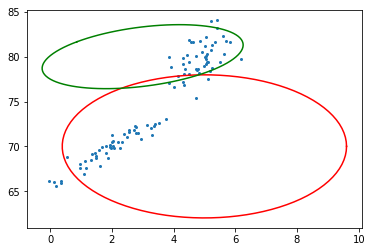

In [16]:
## a 2-model gaussian mixture test case
gmm = [{'mean': mu[m], 'covariance': sigma[m], 'prior': 1.0 / 2} for m in range(2)]
## the data points
data = np.concatenate((mu1, mu2), axis = 0)
## make the plot and compare the results 
gmmplot(data, gmm)

Awesome, the code is actually working, though not so pretty. We may go ahead and apply our algorithm in the next section to see how the plot would change. 

## 4.3 Define a two-model Gaussian mixture test case, synthesize the data, and verify that your algorithm infers the (approximately) correct values based on training data sampled from the model and plotting the results.

As we have already defined our 2-model Gaussian mixture test case `gmm` in the previous section, we just perform our EM algorithm on the dataset and make the plot as below:

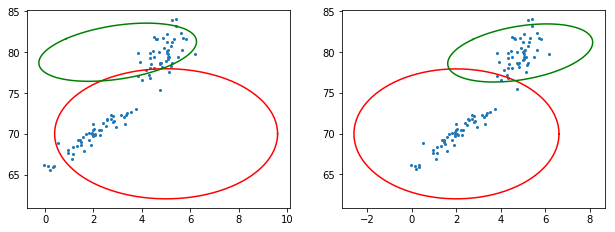

In [17]:
plt.figure(figsize=(16, 8))
gmm0 = copy.deepcopy(gmm)

## plot the init stage of our model
plt.subplot(231)
gmmplot(data, gmm0)

# perform the EM algorithm on the model
for j in range(5):
    posterior = expectation(data, gmm0)
    gmm0 = maximization(posterior, data, gmm0)
        
## plot the final stage
plt.subplot(232)
gmmplot(data, gmm0)

Apparently the performance of our algorithm is pretty reasonable!

## 4.4 Apply your model to the Old Faithful dataset (supplied with the assignment files).  Run the algorithm for the cases $K=1$, $K=2$, and $K=3$.  For each case, plot the progression of the solutions at the beginning, middle, and final steps in the learning.  For each your plots (you should have 9 total), you should also print out the corresponding values of the mean, covariance, and class probabilities.

To apply our model to the Old Faithful dataset, let's first import the dataset as below:

In [18]:
with open('faithful.txt') as csvfile:
    ## read and deliminate the txt file 
    file = csv.reader(csvfile, delimiter = ' ')
    olddata = []
    for row in file:
        olddata.append(np.array(row).astype(np.float))
    
    ## put the data in an array
    olddata = np.asarray(olddata)


And then we may go ahead and initialize the model so as to make the plots:

In [19]:
## initialize the gmm parameters
mu = np.asarray([[3, 50], [4, 70], [6, 60]]).astype('float')
sigma = np.asarray([[[1, 0], [0, 3]], 
                    [[0.4, 0.2], [0.2, 0.5]],
                    [[0.3, 0], [0, 2]]]).astype('float')

## initialize the gmms
## k = 1
gmm1 = [{'mean': mu[m], 'covariance': sigma[m], 'prior': 1.0 / 1} for m in range(1)]
## k = 2
gmm2 = [{'mean': mu[m], 'covariance': sigma[m], 'prior': 1.0 / 2} for m in range(2)]
## k = 3
gmm3 = [{'mean': mu[m], 'covariance': sigma[m], 'prior': 1.0 / 3} for m in range(3)]

gmms = [gmm1, gmm2, gmm3]

In [20]:
## helper function to plot three different gmms, each with 3 plots
def __plot__ (gmms, data):
    ## counter for printing 
    k = 1
    
    for gmmm in gmms:
        ## init new plot each time
        plt.figure(figsize=(16, 8))
        ## index for subplot
        i = 1
        ## copy the gmm data to avoid errors
        gmm = copy.deepcopy(gmmm)
        
        ## plot and print the init stage of our model
        plt.subplot(230 + i)
        gmmplot(data, gmm)
        print("Plot ", k, ":", gmm)
        i += 1
        k += 1

        # perform the EM algorithm on the model
        for j in range(5):
            posterior = expectation(data, gmm)
            gmm = maximization(posterior, data, gmm)
            ## plot and print in the middle of the training 
            if (j == 3):
                plt.subplot(230 + i)
                gmmplot(data, gmm)
                print("Plot ", k,":", gmm)
                i += 1
                k += 1
        
        ## plot and print the final stage
        plt.subplot(230 + i)
        gmmplot(data, gmm)
        print("Plot ", k, ":", gmm)
        i += 1
        k+= 1

Plot  1 : [{'mean': array([ 3., 50.]), 'covariance': array([[1., 0.],
       [0., 3.]]), 'prior': 1.0}]
Plot  2 : [{'mean': array([ 3.48778309, 70.89705882]), 'covariance': array([[1., 0.],
       [0., 3.]]), 'prior': 1.0}]
Plot  3 : [{'mean': array([ 3.48778309, 70.89705882]), 'covariance': array([[1., 0.],
       [0., 3.]]), 'prior': 1.0}]
Plot  4 : [{'mean': array([ 3., 50.]), 'covariance': array([[1., 0.],
       [0., 3.]]), 'prior': 0.5}, {'mean': array([ 4., 70.]), 'covariance': array([[0.4, 0.2],
       [0.2, 0.5]]), 'prior': 0.5}]
Plot  5 : [{'mean': array([ 2.84620396, 63.27896441]), 'covariance': array([[1., 0.],
       [0., 3.]]), 'prior': 0.5691671475561435}, {'mean': array([ 4.33536413, 80.9612149 ]), 'covariance': array([[0.4, 0.2],
       [0.2, 0.5]]), 'prior': 0.4308328524438565}]
Plot  6 : [{'mean': array([ 2.74661774, 61.24770526]), 'covariance': array([[1., 0.],
       [0., 3.]]), 'prior': 0.5358836647722091}, {'mean': array([ 4.34355647, 82.03851315]), 'covariance':

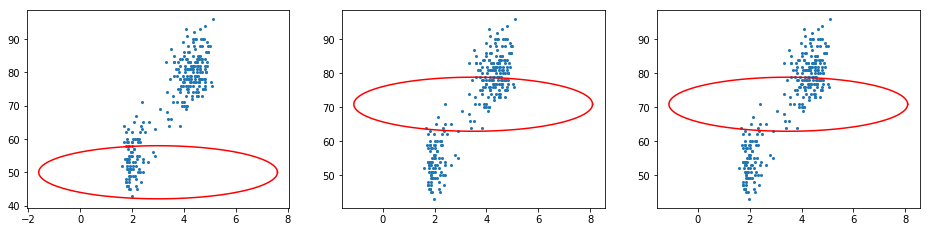

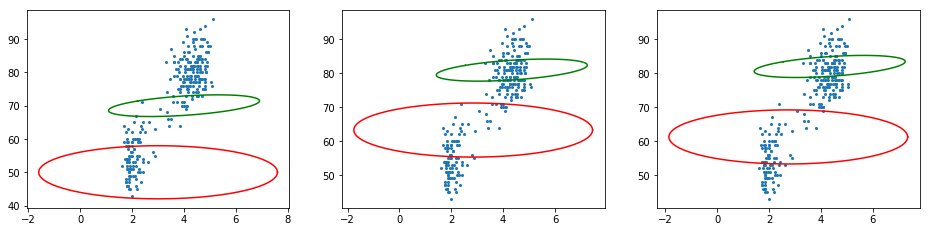

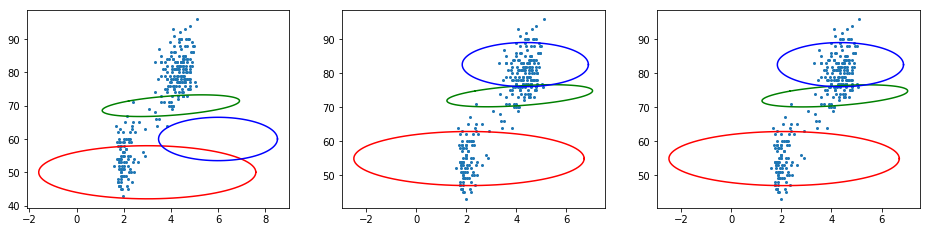

In [21]:
__plot__(gmms, olddata)

The result looks pretty good!

# Exploration

## Introduction

So in Exercise 3, we have performed PCA on the dataset to reducte data dimensions, while in Exercise 4, we have applied our EM algorithm on a few Gaussian mixture models to train and cluster the data points. In this part, I'd like to combine the two exercises a little bit to see how the two methods can contribute to real data classification in practice. 

My exploration exercise can be broken down into a few steps as below:

1. Choose and inspect the dataset.
2. Perform PCA on the dataset to find appropriate principal components so as the "flatten" the dimension of our datasets as a preparation for step 3.
3. Apply the EM algorithm we came up with in Exercise 4 on the flatten dataset and see how it goes.
4. Try to come up with different sets of mean and covariances to fit the dataset. See how different parameters can affect the final training effects of our EM algorithm.

Apparently, procedures from step 1 to step 3 are basically similar to what we have done before, so we should be able to reuse our existing code to achieve these steps. Therefore, to make this exploration part a little bit more challenging, I will be spending more time on choosing an appropriate dataset that can fulfill the ultimate goal of this exercise: a dataset complicated enough so that we can possibly perform more experiments in our step 4.

## Data inspection